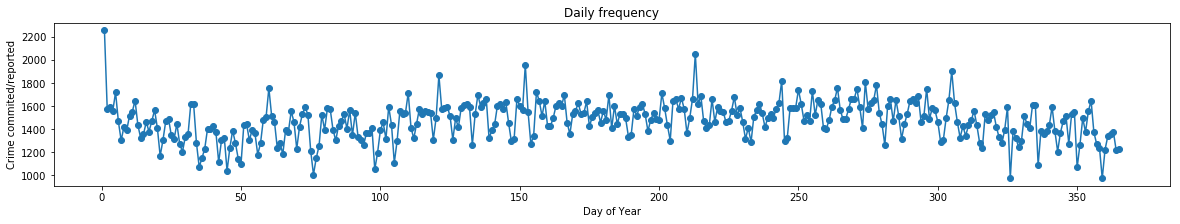

In [5]:
import re
from datetime import datetime
import numpy as np
from matplotlib import pyplot
pattern=re.compile("^\('(\d{2}/\d{2}/\d{4})',\s(\d*)\)")
f=open("day/2007.txt")
list = []
for line in f:
    tuple = pattern.match(line)
    date = datetime.strptime(tuple[1],'%m/%d/%Y').date().toordinal()
    occurence = int (tuple[2])
    tuple = (date, occurence)
    list.append(tuple)
dtypes = np.dtype({ 'names' : ('timestamp', 'occurence'),
                        'formats' : [np.int, np.int] })
data = np.asarray(list, dtype = dtypes)
data = data[data['timestamp'].argsort()]
dates = [datetime.fromordinal(d) for d in data['timestamp']]
frequency = data['occurence']
year_start = datetime(2007, 1, 1)
days = [(d - year_start).days + 1 for d in dates]
fig = pyplot.figure(figsize = (20,3))
pyplot.title('Daily frequency')
pyplot.ylabel('Crime commited/reported')
pyplot.xlabel('Day of Year')
pyplot.plot(days, frequency, marker='o')
pyplot.show()